In [17]:
# pip install seaborn

In [18]:
# pip install codecs

In [19]:
import pandas as pd
import codecs

with codecs.open("Resources/DataCoSupplyChainDataset_Original.csv", 'r', encoding='ISO-8859-1') as f:
    DataCO_df = pd.read_csv(f)


DataCO_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [20]:
# #import dependencies & setup
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import seaborn as sns
# from pathlib import Path
# from scipy import stats
# import codecs
# %matplotlib inline


# # file to load 
# DataCO_to_load = Path("Resources/DataCoSupplyChainDataset_Original.csv", encoding='ISO-8859-1')

# # read CSV
# DataCo_Dataset = pd.read_csv(DataCO_to_load)

# # convert to pandas df
# DataCo_Supply_df = pd.DataFrame(DataCo_Dataset)

In [21]:
# Viewing df columns & data types

# DataCO_df.columns
DataCO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

## Exploratory Analysis

In [22]:
# How many orders were logged in this dataset?
orders_count = len(DataCO_df.index)
print(f'There are {orders_count} orders in the dataset')

There are 180519 orders in the dataset


In [23]:
# How many orders were made per payment type?
pay_type_count = DataCO_df['Type'].value_counts()
pay_type_count

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [24]:
# What is the average (scheduled) shipping speed in days?
sched_ship_days_avg = DataCO_df['Days for shipment (scheduled)'].mean()
print(f"Average 'Days for shipment (scheduled)': {sched_ship_days_avg} days")

Average 'Days for shipment (scheduled)': 2.931846509231715 days


In [25]:
# What is the average (real) shipping speed in days?
real_ship_days_avg = DataCO_df['Days for shipping (real)'].mean()
print(f"Average 'Days for shipping (real)': {real_ship_days_avg} days")


Average 'Days for shipping (real)': 3.4976539865609713 days


In [26]:
# What is the variance between the number of scheduled and real shhipping days?

In [30]:
# How many orders were shipped per city?
# What were the top ten cities where orders were shipped?
city_order_counts = DataCO_df['Customer City'].value_counts()
city_order_counts.head(10)


Caguas          66770
Chicago          3885
Los Angeles      3417
Brooklyn         3412
New York         1816
Philadelphia     1577
Bronx            1500
San Diego        1437
Miami            1314
Houston          1297
Name: Customer City, dtype: int64

In [33]:
# What were the bottom ten cities where orders were shipped?
city_order_counts.tail(10)


Hempstead        35
Reno             35
Marion           34
National City    30
Sumner           28
Bartlett         25
Malden           22
Ponce            22
Freehold         13
CA                3
Name: Customer City, dtype: int64

In [35]:
# How many orders were shipped per country?
country_order_counts = DataCO_df['Customer Country'].value_counts()
country_order_counts.head(10)


EE. UU.        111146
Puerto Rico     69373
Name: Customer Country, dtype: int64

In [40]:
# Analyze the prodct department distribution among all different cities, and try to fidn patterns.
category_counts = DataCO_df.groupby(['Customer City', 'Department Name'])['Department Name'].count().unstack().fillna(0)
category_counts


Department Name,Apparel,Book Shop,Discs Shop,Fan Shop,Fitness,Footwear,Golf,Health and Beauty,Outdoors,Pet Shop,Technology
Customer City,,,,,,,,,,,
Aguadilla,18.0,0.0,0.0,27.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0
Alameda,33.0,0.0,0.0,49.0,1.0,13.0,17.0,0.0,5.0,0.0,0.0
Albany,16.0,0.0,0.0,24.0,4.0,9.0,15.0,0.0,3.0,0.0,0.0
Albuquerque,163.0,1.0,7.0,191.0,6.0,40.0,120.0,0.0,17.0,0.0,7.0
Algonquin,36.0,0.0,4.0,45.0,0.0,9.0,22.0,1.0,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
Yonkers,44.0,1.0,2.0,46.0,2.0,7.0,24.0,0.0,9.0,3.0,0.0
York,66.0,1.0,3.0,81.0,4.0,28.0,43.0,0.0,13.0,1.0,1.0
Ypsilanti,30.0,1.0,5.0,57.0,1.0,7.0,31.0,0.0,10.0,0.0,2.0


## Basic ML model to predict future late shipments based on historical data

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [49]:
# Select relevant features and the target variable
features = ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Order Item Quantity']
target = 'Late_delivery_risk'

# Create the feature matrix (X) and target vector (y)
X = DataCO_df[features]
y = DataCO_df[target]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.09621552988659259
R-squared: 0.6115077471300709


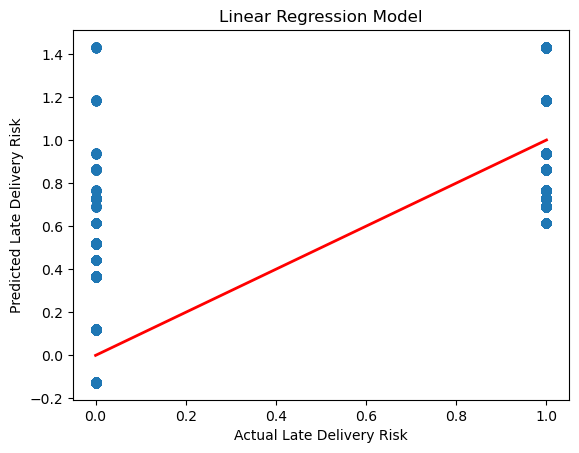

In [51]:
# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Late Delivery Risk")
plt.ylabel("Predicted Late Delivery Risk")

# Plot the regression line
x_range = np.linspace(y_test.min(), y_test.max(), 100)
y_range = x_range
plt.plot(x_range, y_range, color='red', linestyle='-', linewidth=2)

plt.title("Linear Regression Model")
plt.show()